<a href="https://colab.research.google.com/github/Saiteja2812/Emission-of-CO-by-Vechiles/blob/main/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Emission of CO by Vechiles**

Goal of the project is to find amount of carbon dioxide emitted by vechiles.

## **Dataset Description**

**features** used:

manufacturer: company which manufactured the vechile.

model: range and other features of vechile.

euro_standard: it is the value of emission of no2 by vechiles in europe.

transmission: total number of gears in vechile.

transmission_type: gearbox type like automatic or manual.

engine_capacity: volume of fuel that can be pushed into the vechile.

fuel_type: like petrol,disel etc.,

metric: relative capabilities of vechiles includes extra_urban_metric,urban_metric,combined_metric.

noise_level: the amount of sound produced by vechile measured in desibles(db)

i used urban_imperial,extra_urban_imperial,combined_imperial as features.

**label** is co_emission.


# **Code**

In [40]:
#import requied libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
import io

In [42]:
#importing dataset
from google.colab import files 
uploaded=files.upload()

Saving data.csv to data (1).csv


In [43]:
df= pd.read_csv(io.BytesIO(uploaded['data.csv']))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [44]:
df

,file,year,manufacturer,model,description,euro_standard,tax_band,transmission,transmission_type,engine_capacity,fuel_type,urban_metric,extra_urban_metric,combined_metric,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,co2,thc_emissions,co_emissions,nox_emissions,thc_nox_emissions,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,Petrol,11.1,6.5,8.2,25.4,43.5,34.4,74.0,195,NaN,980.0,NaN,NaN,NaN,NaN,618.0,NaN,NaN,NaN,NaN,NaN
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,Petrol,11.5,6.6,8.4,24.6,42.8,33.6,74.0,200,NaN,1105.0,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,2,NaN,M5,Manual,1970.0,Petrol,12.4,6.6,8.8,22.8,42.8,32.1,74.0,210,NaN,1103.0,NaN,NaN,NaN,NaN,663.0,NaN,NaN,NaN,NaN,NaN
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,Petrol,11.3,6.6,8.3,25.0,42.8,34.0,73.0,195,NaN,980.0,NaN,NaN,NaN,NaN,626.0,NaN,NaN,NaN,NaN,NaN
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,Petrol,11.5,6.6,8.4,24.6,42.8,33.6,74.0,200,NaN,1105.0,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45506,download-data-for-Aug-2013-Euro-6.csv,2013,Volkswagen,New Golf 2013,2.0 TDI 184PS 5 door DSG,6,D,D6,NaN,1968.0,Diesel,5.7,4.1,4.7,49.6,68.9,60.1,74.0,122,NaN,165.0,74.0,108.0,0.0,1316.0,NaN,NaN,NaN,NaN,NaN,NaN
45507,download-data-for-Aug-2013-Euro-6.csv,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 220PS 3 / 5 door,6,E,M6,NaN,1984.0,Petrol,7.5,5.1,6.0,37.7,55.4,47.1,72.0,139,47.0,409.0,38.0,35.0,NaN,1598.0,NaN,NaN,NaN,NaN,NaN,NaN
45508,download-data-for-Aug-2013-Euro-6.csv,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 230PS 3 / 5 door,6,E,M6,NaN,1984.0,Petrol,7.5,5.1,6.0,37.7,55.4,47.1,72.0,139,47.0,409.0,38.0,35.0,NaN,1598.0,NaN,NaN,NaN,NaN,NaN,NaN
45509,download-data-for-Aug-2013-Euro-6.csv,2013,Volkswagen,New Golf 2013,GTI 2.0 TSI 220PS 3 / 5 door DSG,6,F,D6,NaN,1984.0,Petrol,8.1,5.3,6.4,34.9,53.3,44.1,74.0,148,63.0,357.0,54.0,32.0,NaN,1707.0,NaN,NaN,NaN,NaN,NaN,NaN


# **Data** **Visualisation**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


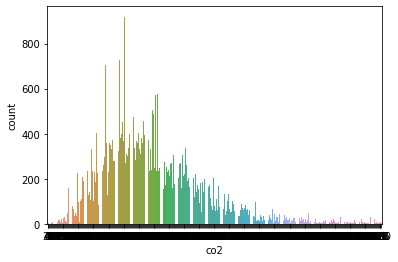

In [45]:
sns.countplot(df['co2'])

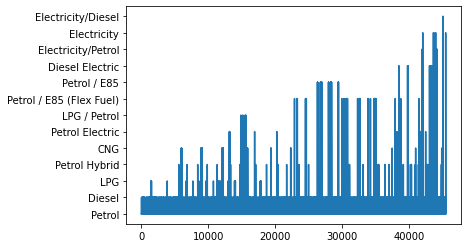

In [46]:
plt.plot(df['fuel_type'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe16cb6c490>]],
      dtype=object)

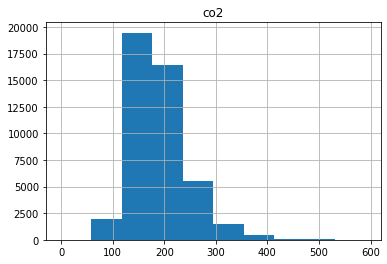

In [47]:
df.hist(column="co2")

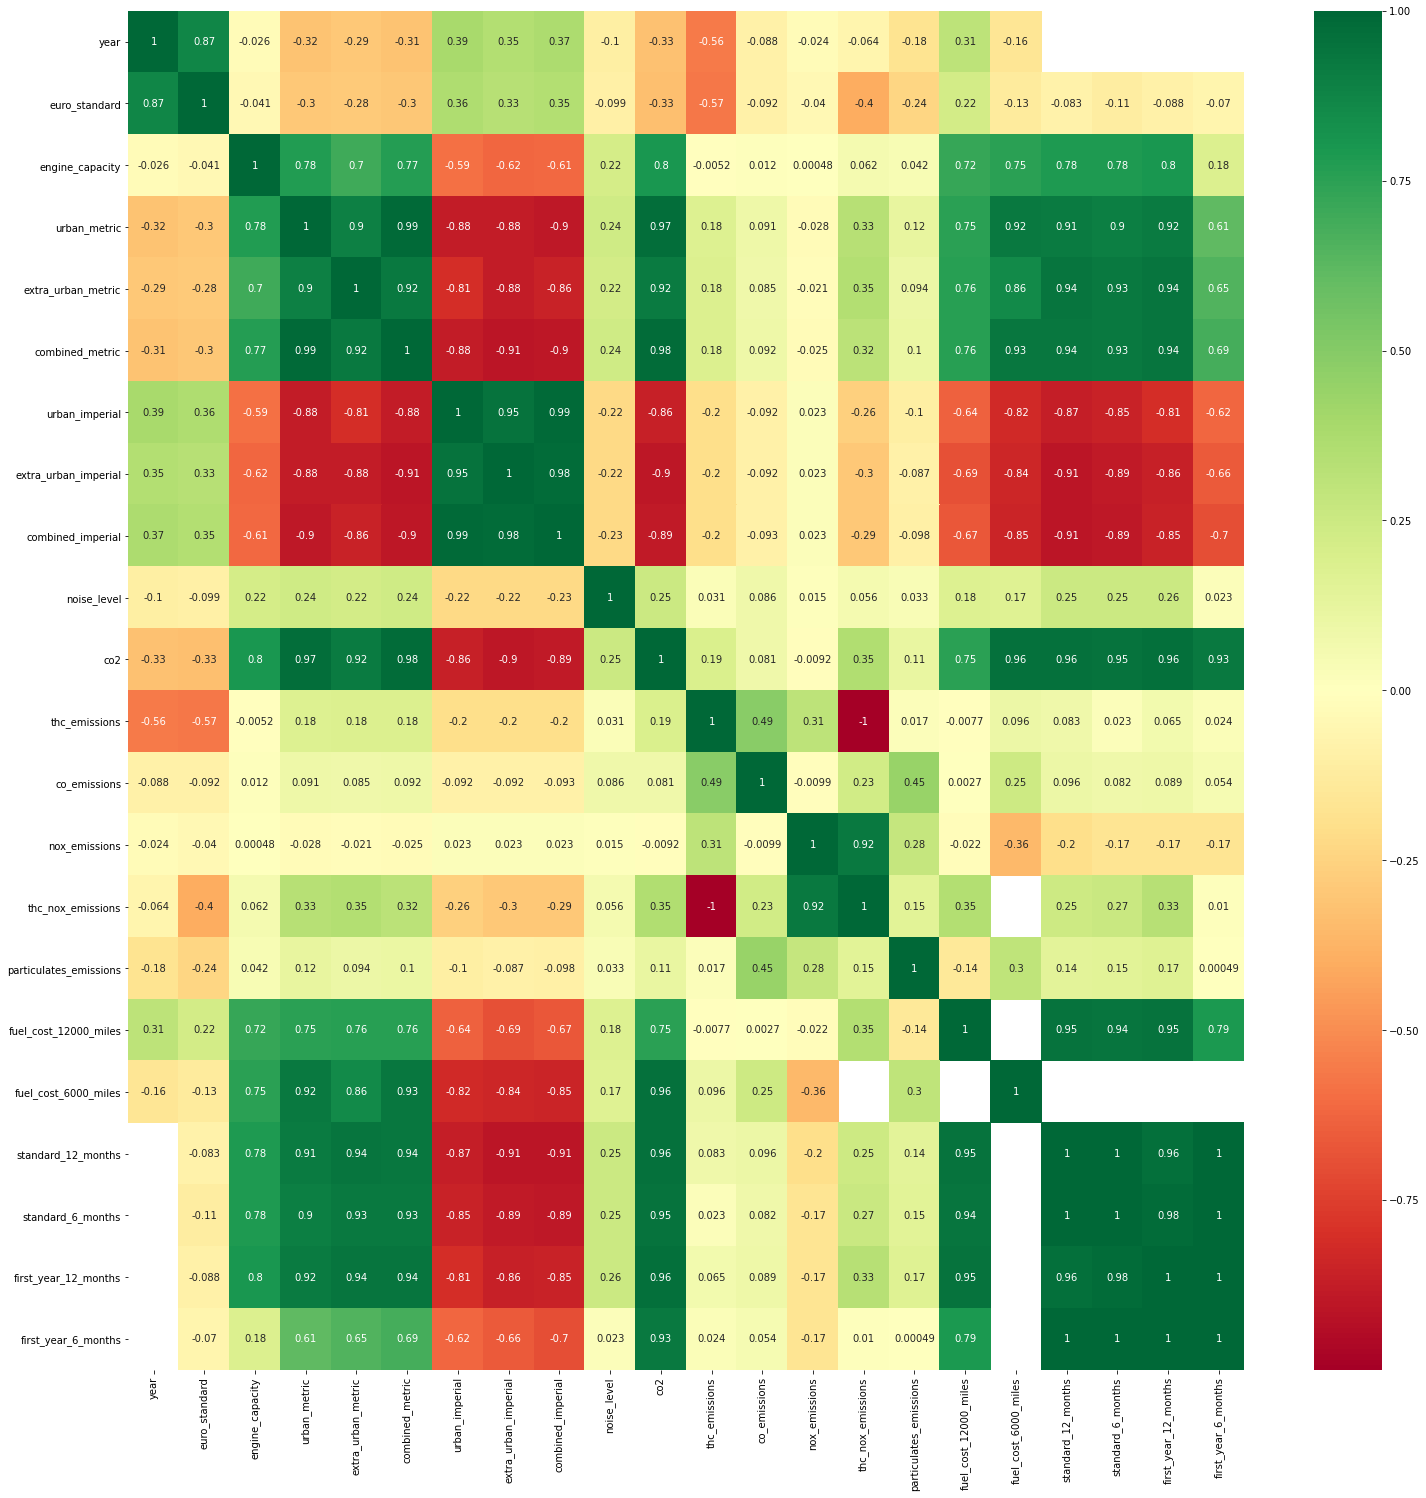

In [49]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [50]:
df.describe()

,year,euro_standard,engine_capacity,urban_metric,extra_urban_metric,combined_metric,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,co2,thc_emissions,co_emissions,nox_emissions,thc_nox_emissions,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months
count,45511.000000,45511.000000,45504.000000,45498.000000,45498.000000,45504.000000,45498.000000,45498.000000,45504.000000,45502.000000,45511.000000,23190.000000,45192.000000,40150.000000,5430.000000,14801.000000,33136.000000,12200.000000,3517.000000,2926.000000,3517.000000,1419.000000
mean,2007.316055,3.969282,2182.770526,10.472676,6.139602,7.721963,30.527557,49.139714,40.048475,72.141437,189.592846,62.526498,375.084962,127.164387,171.675235,3.312089,1548.094490,610.982869,165.612738,107.159774,231.558146,78.872093
std,3.832559,0.838025,899.100669,3.984944,1.783382,2.503880,10.623745,12.189658,11.869572,1.825107,56.993217,33.425421,1048.920760,1189.748216,35.786659,12.678128,518.408529,181.508911,114.299761,56.606074,264.641858,11.871715
min,2000.000000,2.000000,209.000000,3.100000,2.900000,1.200000,6.800000,5.400000,5.900000,0.200000,0.000000,1.000000,-200.000000,0.250000,0.290000,0.000000,0.000000,0.000000,0.000000,55.000000,0.000000,66.000000
25%,2004.000000,3.000000,1598.000000,7.700000,4.900000,5.900000,22.800000,40.400000,31.400000,71.000000,150.000000,40.000000,188.800000,24.000000,155.000000,0.019000,1220.570000,497.000000,100.000000,66.000000,0.000000,66.000000
50%,2008.000000,4.000000,1988.000000,9.800000,5.900000,7.300000,28.800000,47.900000,38.700000,72.000000,180.000000,55.000000,302.000000,56.000000,170.000000,0.073000,1463.000000,592.000000,135.000000,93.500000,135.000000,74.250000
75%,2011.000000,5.000000,2429.000000,12.400000,7.000000,9.000000,36.700000,57.600000,47.900000,73.300000,218.000000,81.000000,480.000000,179.000000,187.000000,0.800000,1768.250000,693.000000,215.000000,118.250000,325.000000,93.500000
max,2013.000000,6.000000,8285.000000,41.200000,97.900000,44.000000,91.100000,97.400000,235.400000,83.000000,590.000000,600.000000,75000.000000,237000.000000,332.000000,396.000000,5538.000000,3329.000000,475.000000,261.250000,1030.000000,93.500000


In [51]:
#considering first 15000 rows from dataset
df=df[:15000]

In [52]:
df

,file,year,manufacturer,model,description,euro_standard,tax_band,transmission,transmission_type,engine_capacity,fuel_type,urban_metric,extra_urban_metric,combined_metric,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,co2,thc_emissions,co_emissions,nox_emissions,thc_nox_emissions,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,Petrol,11.1,6.5,8.2,25.4,43.5,34.4,74.0,195,NaN,980.0,NaN,NaN,NaN,NaN,618.0,NaN,NaN,NaN,NaN,NaN
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,Petrol,11.5,6.6,8.4,24.6,42.8,33.6,74.0,200,NaN,1105.0,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,2,NaN,M5,Manual,1970.0,Petrol,12.4,6.6,8.8,22.8,42.8,32.1,74.0,210,NaN,1103.0,NaN,NaN,NaN,NaN,663.0,NaN,NaN,NaN,NaN,NaN
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,Petrol,11.3,6.6,8.3,25.0,42.8,34.0,73.0,195,NaN,980.0,NaN,NaN,NaN,NaN,626.0,NaN,NaN,NaN,NaN,NaN
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,Petrol,11.5,6.6,8.4,24.6,42.8,33.6,74.0,200,NaN,1105.0,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Part_A_Euro_IV_may2005.csv,2005,Vauxhall,"Corsa, MY2004",1.3CDTI Life 5 Door Hatchback From VIN: W0L0XC...,4,NaN,M5,Manual,1248.0,Diesel,5.7,3.8,4.5,49.6,74.3,62.8,71.0,122,NaN,155.0,195.0,NaN,20.0,339.0,NaN,NaN,NaN,NaN,NaN,NaN
14996,Part_A_Euro_IV_may2005.csv,2005,Vauxhall,"Corsa, MY2004",1.3CDTI POLICE 3 Door Hatchback From VIN: W0L0...,4,NaN,M5,Manual,1248.0,Diesel,5.7,3.8,4.5,49.6,74.3,62.8,71.0,122,NaN,155.0,195.0,NaN,20.0,339.0,NaN,NaN,NaN,NaN,NaN,NaN
14997,Part_A_Euro_IV_may2005.csv,2005,Vauxhall,"Corsa, MY2004",1.3CDTI POLICE 5 Door Hatchback From VIN: W0L0...,4,NaN,M5,Manual,1248.0,Diesel,5.7,3.8,4.5,49.6,74.3,62.8,71.0,122,NaN,155.0,195.0,NaN,20.0,339.0,NaN,NaN,NaN,NaN,NaN,NaN
14998,Part_A_Euro_IV_may2005.csv,2005,Vauxhall,"Corsa, MY2004",1.3CDTI SXI 3 Door Hatchback From VIN: W0L0XCF...,4,NaN,M5,Manual,1248.0,Diesel,5.7,3.8,4.5,49.6,74.3,62.8,71.0,122,NaN,155.0,195.0,NaN,20.0,339.0,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df["fuel_type"] = df["fuel_type"].astype('category')
df["manufacturer"] = df["manufacturer"].astype('category')
df["model"] = df["model"].astype('category')
df["transmission"] = df["transmission"].astype('category')
df["transmission_type"] = df["transmission_type"].astype('category')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [54]:
df["fuel_type"] = df["fuel_type"].cat.codes
df["manufacturer"] = df["manufacturer"].cat.codes
df["model"] = df["model"].cat.codes
df["transmission"] = df["transmission"].cat.codes
df["transmission_type"] = df["transmission_type"].cat.codes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [55]:
df
df =df[df["fuel_type"]>=0]
df =df[df["engine_capacity"]>=0]
df =df[df["urban_metric"]>=0]
df =df[df["extra_urban_metric"]>=0]
df =df[df["combined_metric"]>=0]
df =df[df["urban_imperial"]>=0]
df =df[df["extra_urban_imperial"]>=0]

df =df[df["combined_imperial"]>=0]
df =df[df["noise_level"]>=0]
df =df[df["co2"]>=0]
df =df[df["co_emissions"]>=0]
df =df[df["co_emissions"]<=950]
df =df[df["co2"]<=300]


In [56]:
df

,file,year,manufacturer,model,description,euro_standard,tax_band,transmission,transmission_type,engine_capacity,fuel_type,urban_metric,extra_urban_metric,combined_metric,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,co2,thc_emissions,co_emissions,nox_emissions,thc_nox_emissions,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change
6,DatapartC_july2000.csv,2000,0,9,1.6 Twin Spark 16v,2,NaN,33,1,1598.0,4,11.4,6.4,8.2,24.8,44.1,34.4,74.0,195,NaN,919.0,NaN,NaN,NaN,NaN,618.0,NaN,NaN,NaN,NaN,NaN
10,DatapartC_july2000.csv,2000,0,9,2.4 JTD,2,NaN,33,1,2387.0,1,8.9,5.4,6.7,31.7,52.3,42.2,74.0,178,NaN,666.0,NaN,NaN,0.062,NaN,517.0,NaN,NaN,NaN,NaN,NaN
14,DatapartC_july2000.csv,2000,0,17,1.8 Twin Spark 16v,2,NaN,33,1,1747.0,4,11.7,6.4,8.4,24.1,44.1,33.6,74.0,199,NaN,848.0,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
17,DatapartC_july2000.csv,2000,0,17,2.4 JTD,2,NaN,33,1,2387.0,1,9.0,5.6,6.8,31.4,50.4,41.5,74.0,180,NaN,894.0,NaN,NaN,0.056,NaN,526.0,NaN,NaN,NaN,NaN,NaN
33,DatapartC_july2000.csv,2000,2,151,S3 1.8 T Quattro 210bhp,2,NaN,50,1,1781.0,4,12.3,7.3,9.2,23.0,38.7,30.7,74.0,221,NaN,667.0,NaN,NaN,NaN,NaN,693.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Part_A_Euro_IV_may2005.csv,2005,50,308,1.3CDTI Life 5 Door Hatchback From VIN: W0L0XC...,4,NaN,33,1,1248.0,1,5.7,3.8,4.5,49.6,74.3,62.8,71.0,122,NaN,155.0,195.0,NaN,20.000,339.0,NaN,NaN,NaN,NaN,NaN,NaN
14996,Part_A_Euro_IV_may2005.csv,2005,50,308,1.3CDTI POLICE 3 Door Hatchback From VIN: W0L0...,4,NaN,33,1,1248.0,1,5.7,3.8,4.5,49.6,74.3,62.8,71.0,122,NaN,155.0,195.0,NaN,20.000,339.0,NaN,NaN,NaN,NaN,NaN,NaN
14997,Part_A_Euro_IV_may2005.csv,2005,50,308,1.3CDTI POLICE 5 Door Hatchback From VIN: W0L0...,4,NaN,33,1,1248.0,1,5.7,3.8,4.5,49.6,74.3,62.8,71.0,122,NaN,155.0,195.0,NaN,20.000,339.0,NaN,NaN,NaN,NaN,NaN,NaN
14998,Part_A_Euro_IV_may2005.csv,2005,50,308,1.3CDTI SXI 3 Door Hatchback From VIN: W0L0XCF...,4,NaN,33,1,1248.0,1,5.7,3.8,4.5,49.6,74.3,62.8,71.0,122,NaN,155.0,195.0,NaN,20.000,339.0,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df=df[df['engine_capacity']>=0]

In [58]:
from sklearn.model_selection import train_test_split


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12837 entries, 6 to 14999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   file                    12837 non-null  object 
 1   year                    12837 non-null  int64  
 2   manufacturer            12837 non-null  int8   
 3   model                   12837 non-null  int16  
 4   description             12837 non-null  object 
 5   euro_standard           12837 non-null  int64  
 6   tax_band                0 non-null      object 
 7   transmission            12837 non-null  int8   
 8   transmission_type       12837 non-null  int8   
 9   engine_capacity         12837 non-null  float64
 10  fuel_type               12837 non-null  int8   
 11  urban_metric            12837 non-null  float64
 12  extra_urban_metric      12837 non-null  float64
 13  combined_metric         12837 non-null  float64
 14  urban_imperial          12837 non-null

In [60]:
#features
X=df[['manufacturer', 'model','euro_standard','transmission','transmission_type', 'engine_capacity',
       'fuel_type', 'urban_metric', 'extra_urban_metric', 'combined_metric',
       'urban_imperial', 'extra_urban_imperial', 'combined_imperial',
       'noise_level', 'co2']].values

In [61]:
#label
Y=df[["co_emissions"]].values

In [62]:
#training and testing the model
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr= LinearRegression()

In [65]:
reg=lr.fit(X_train,Y_train)

In [66]:
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
#output
y_predict=reg.predict(X_test)

In [68]:
df

,file,year,manufacturer,model,description,euro_standard,tax_band,transmission,transmission_type,engine_capacity,fuel_type,urban_metric,extra_urban_metric,combined_metric,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,co2,thc_emissions,co_emissions,nox_emissions,thc_nox_emissions,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change
6,DatapartC_july2000.csv,2000,0,9,1.6 Twin Spark 16v,2,NaN,33,1,1598.0,4,11.4,6.4,8.2,24.8,44.1,34.4,74.0,195,NaN,919.0,NaN,NaN,NaN,NaN,618.0,NaN,NaN,NaN,NaN,NaN
10,DatapartC_july2000.csv,2000,0,9,2.4 JTD,2,NaN,33,1,2387.0,1,8.9,5.4,6.7,31.7,52.3,42.2,74.0,178,NaN,666.0,NaN,NaN,0.062,NaN,517.0,NaN,NaN,NaN,NaN,NaN
14,DatapartC_july2000.csv,2000,0,17,1.8 Twin Spark 16v,2,NaN,33,1,1747.0,4,11.7,6.4,8.4,24.1,44.1,33.6,74.0,199,NaN,848.0,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
17,DatapartC_july2000.csv,2000,0,17,2.4 JTD,2,NaN,33,1,2387.0,1,9.0,5.6,6.8,31.4,50.4,41.5,74.0,180,NaN,894.0,NaN,NaN,0.056,NaN,526.0,NaN,NaN,NaN,NaN,NaN
33,DatapartC_july2000.csv,2000,2,151,S3 1.8 T Quattro 210bhp,2,NaN,50,1,1781.0,4,12.3,7.3,9.2,23.0,38.7,30.7,74.0,221,NaN,667.0,NaN,NaN,NaN,NaN,693.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Part_A_Euro_IV_may2005.csv,2005,50,308,1.3CDTI Life 5 Door Hatchback From VIN: W0L0XC...,4,NaN,33,1,1248.0,1,5.7,3.8,4.5,49.6,74.3,62.8,71.0,122,NaN,155.0,195.0,NaN,20.000,339.0,NaN,NaN,NaN,NaN,NaN,NaN
14996,Part_A_Euro_IV_may2005.csv,2005,50,308,1.3CDTI POLICE 3 Door Hatchback From VIN: W0L0...,4,NaN,33,1,1248.0,1,5.7,3.8,4.5,49.6,74.3,62.8,71.0,122,NaN,155.0,195.0,NaN,20.000,339.0,NaN,NaN,NaN,NaN,NaN,NaN
14997,Part_A_Euro_IV_may2005.csv,2005,50,308,1.3CDTI POLICE 5 Door Hatchback From VIN: W0L0...,4,NaN,33,1,1248.0,1,5.7,3.8,4.5,49.6,74.3,62.8,71.0,122,NaN,155.0,195.0,NaN,20.000,339.0,NaN,NaN,NaN,NaN,NaN,NaN
14998,Part_A_Euro_IV_may2005.csv,2005,50,308,1.3CDTI SXI 3 Door Hatchback From VIN: W0L0XCF...,4,NaN,33,1,1248.0,1,5.7,3.8,4.5,49.6,74.3,62.8,71.0,122,NaN,155.0,195.0,NaN,20.000,339.0,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
reg.predict([[0,9,2,33,1,1598.0,4,11.4,6.4,8.2,24.8,44.1,34.4,74.0,195]])
#manufacturer,model,euro_standard,transmission,transmission_type,engine_capacity,fuel_type,urban_metric,extra_urban_metric,combined_metric,urban_imperial,extra_urban_imperial,combined_imperial,noise_level, co2

array([[616.27732436]])

In [70]:
from sklearn import metrics

In [72]:
metrics.mean_absolute_error(Y_test, y_predict)

155.0546814503477

# **Final** **Words**

I have choosen regression over classification. Considering dataset regression is best when we compare with classification.